In [2]:
!pip install pandas

In [3]:
import pandas as pd
import numpy as np

In [323]:
data = pd.read_csv('playstore-analysis (1).csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [324]:
type(data)

pandas.core.frame.DataFrame

In [325]:
data.shape

(10841, 13)

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [327]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [328]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [329]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [330]:
data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [331]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### 1. Data clean up – Missing value treatment

### a. Drop records where rating is missing since rating is our target/study variable

In [332]:
pd.isnull(data["Rating"])

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838     True
10839    False
10840    False
Name: Rating, Length: 10841, dtype: bool

In [ ]:
data.dropna(subset=["Rating"],inplace=True)

In [334]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

### b. Check the null values for the Android Ver column. 

In [335]:
pd.isnull(data["Android Ver"]).sum()

3

In [336]:
data1=data.drop(10472)
Check = data1[data1["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print(Check)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [337]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [338]:
data1[data1.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [339]:
import statistics
Android_list = list(data1['Android Ver'])
data1_new = data1.fillna(statistics.mode(Android_list))

print(data1_new.loc[[4453]])
print('\n')
print(data1_new.loc[[4490]])

                         App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   

     Installs  Type  Price Content Rating           Genres   Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization  July 20, 2018   

     Current Ver Android Ver  
4453         4.4  4.1 and up  


                       App         Category  Rating Reviews    Size Installs  \
4490  Pi Dark [substratum]  PERSONALIZATION     4.5     189  2100.0  10,000+   

      Type Price Content Rating           Genres    Last Updated Current Ver  \
4490  Free     0       Everyone  Personalization  March 27, 2018         1.1   

     Android Ver  
4490  4.1 and up  


### c. Current ver – replace with most common value

In [340]:
data1_new['Current Ver'].isnull().sum()

0

In [341]:
data1_new

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 2. Data clean up – correcting the data types

### a. Which all variables need to be brought to numeric types?

In [342]:
data1_new['Reviews'] = data1_new['Reviews'].astype(int)
data1_new['Size'] = data1_new['Size'].astype(int)

data1_new['Last Updated'] = data1_new['Last Updated'].astype('datetime64[ns]')

### b. Price variable – remove $ sign and convert to float

In [343]:
data1_new['Price'] = data1_new['Price'].str.replace('$', '')

C:\Users\infotech\AppData\Local\Temp/ipykernel_11804/136510205.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1_new['Price'] = data1_new['Price'].str.replace('$', '')


In [344]:
data1_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [345]:
data1_new['Price'] = data1_new['Price'].astype(float)

In [346]:
data1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1.2+ MB


### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [347]:
data1_new['Installs'] = data1_new['Installs'].str.replace('+','')

C:\Users\infotech\AppData\Local\Temp/ipykernel_11804/165106036.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1_new['Installs'] = data1_new['Installs'].str.replace('+','')


In [348]:
data1_new['Installs'] = data1_new['Installs'].str.replace(',', '')

In [349]:
data1_new['Installs'] = data1_new['Installs'].str.replace(',', '')

In [350]:
data1_new['Installs'] = data1_new['Installs'].astype(int)

In [351]:
data1_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [352]:
data1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 1.1+ MB


### 3. Sanity checks – check for the following and handle accordingly

### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play 
store.

In [353]:
data1_new.loc[(data1_new.Rating >=1) & (data1_new.Rating <=5 )]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


### b. Reviews should not be more than installs as only those who installed can review the 
app.

### i. Are there any such records? Drop if so.

In [354]:
data1_new.loc[(data1_new.Reviews <= data1_new.Installs)]
data1_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [355]:
data1_new.shape

(9366, 13)

In [356]:
import matplotlib
import matplotlib.pyplot as plt

### 4. Identify and handle outliers – 

### a. Price column

### i. Make suitable plot to identify outliers in price

<AxesSubplot:>

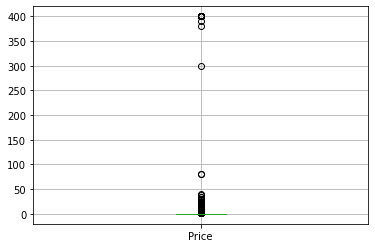

In [357]:
data1_new.boxplot(column="Price")

### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [358]:
data1_new.loc[data1_new["Price"]==200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### iv. After dropping the useless records, make the suitable plot again to identify 
outliers

In [359]:
data1_new.loc[data1_new["Price"]<30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [360]:
data1_new.drop(data1_new[(data1_new["Price"]>30)].index,axis=0,inplace=True)

In [361]:
count = data1_new.loc[data1_new["Price"] > 30].index
count.value_counts().sum()

0

### iii. Limit data to records with price < $30

<AxesSubplot:>

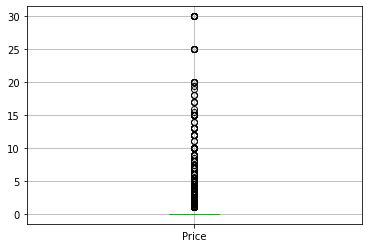

In [362]:
data1_new.boxplot(column="Price")

In [363]:
data1_new.shape

(9345, 13)

### b. Reviews column
### i. Make suitable plot

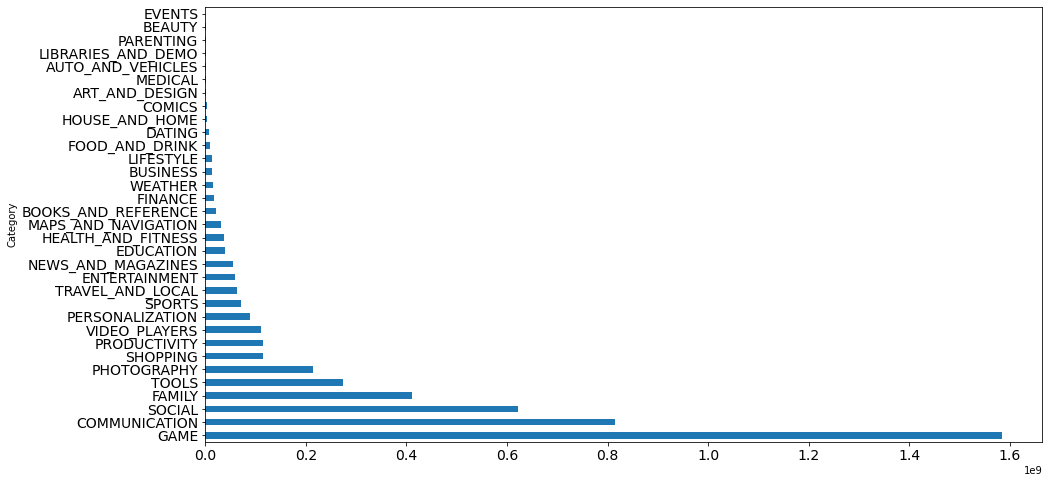

In [364]:
Fig=data1_new.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
plt.subplots(figsize=(15,8))
Fig.plot(kind='barh', fontsize=14)
plt.show()

### ii. Limit data to apps with < 1 Million reviews

In [365]:
data1_new[data1_new["Reviews"]<1000000]
data1_new.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### c. Installs
### i. What is the 95th percentile of the installs?

In [367]:
data1_new.Installs.quantile(0.95)

100000000.0

### ii. Drop records having a value more than the 95th percentile

In [368]:
data1_new.Installs.quantile()>data1_new.Installs.quantile(0.95)

False

In [369]:
import seaborn as sns

### Data analysis to answer business questions
### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower 
### values?

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


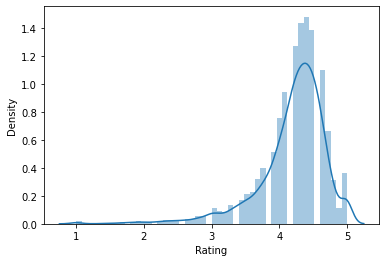

In [370]:
sns.distplot(data1_new['Rating'])
plt.show()

In [371]:
data1_new['Rating'].skew()

-1.85378065137164

In [ ]:
data1_new.Rating.median()

In [372]:
data1_new.Rating.mean()

4.192359550561804

In [373]:
print('The skewness of this distribution is',data1_new['Rating'].skew())

The skewness of this distribution is -1.85378065137164


In [374]:
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(data1_new.Rating.median(),data1_new.Rating.mean()));

The Median of this distribution 4.3 is greater than mean 4.192359550561804 of this distribution


In [375]:
data1_new.Rating.mode()

0    4.4
dtype: float64

#### Since mode>= median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating towards lower values.

### 6. What are the top Content Rating values?
### a. Are there any values with very few records?

In [376]:
data1_new['Content Rating'].value_counts()

Everyone           7400
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

#### Adults only 18+ and Unrated are values with very few records so i drop them.

### b. If yes, drop those as they won’t help in the analysis

In [377]:
data1_new.drop(data1_new[data1_new['Content Rating']=="Unrated"].index , inplace=True)

In [378]:
data1_new.drop(data1_new[data1_new['Content Rating']=="Adults only 18+"].index,inplace=True)

In [379]:
data1_new.groupby("Content Rating").count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Everyone,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400
Everyone 10+,397,397,397,397,397,397,397,397,397,397,397,397
Mature 17+,461,461,461,461,461,461,461,461,461,461,461,461
Teen,1083,1083,1083,1083,1083,1083,1083,1083,1083,1083,1083,1083


### 7. Effect of size on rating
### a. Make a joinplot to understand the effect of size on rating

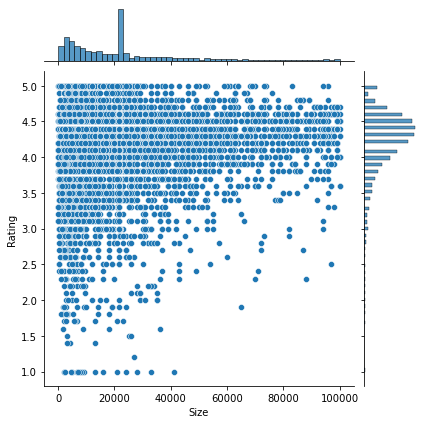

In [380]:
sns.jointplot(x=data1_new["Size"],y=data1_new["Rating"],data=data1_new)

### b. Do you see any patterns?
### Yes, patterns can be observed between Size and Rating.ie. their is correlation between Size and Rating.

### c. How do you explain the pattern?
### Generally on increasing Rating, Size of App also increases. But this is not always true because for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

### 8. Effect of price on rating
### a. Make a jointplot (with regression line)

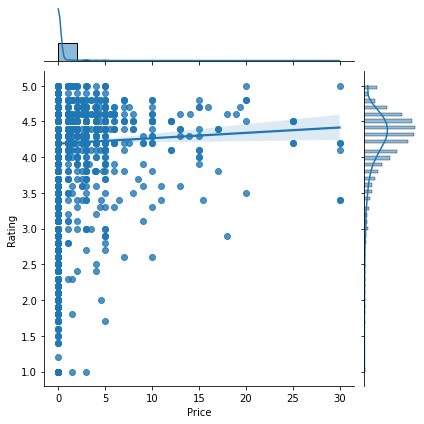

In [381]:
sns.jointplot(x=data1_new["Price"],y=data1_new["Rating"],data=data1_new,kind="reg")

### b. What pattern do you see?
### Generally on increasing the Price, Rating remains almost constant greater than 4.

### c. How do you explain the pattern?
### Generally on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

In [382]:
data1_new.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068033,0.078432,0.051192,0.024318
Reviews,0.068033,1.000000,0.125520,0.641583,-0.028635
Size,0.078432,0.125520,1.000000,0.075365,-0.010879
Installs,0.051192,0.641583,0.075365,1.000000,-0.035359
Price,0.024318,-0.028635,-0.010879,-0.035359,1.000000


### d. Replot the data, this time with only records with price > 0

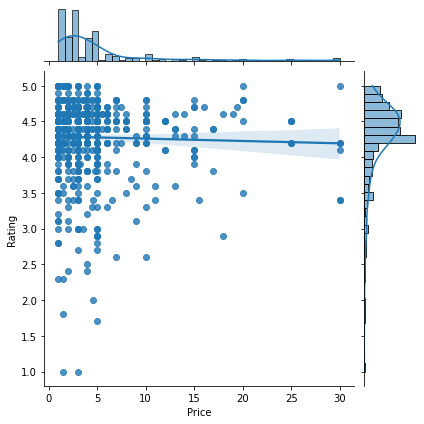

In [383]:
Price_greaterthan_zero=data1_new.loc[data1_new["Price"]>0]
sns.jointplot(x="Price",y="Rating",data=Price_greaterthan_zero,kind="reg")

### e. Does the pattern change?
### Yes, On the record with Price > 0, the overall pattern changed a slight ie their is very Negative Correlation between Price and Rating

### f. What is your overall inference on the effect of price on the rating

In [384]:
Price_greaterthan_zero.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.041953,0.117007,0.056924,-0.028721
Reviews,0.041953,1.000000,0.035459,0.867266,0.018741
Size,0.117007,0.035459,1.000000,0.075520,0.025218
Installs,0.056924,0.867266,0.075520,1.000000,-0.012392
Price,-0.028721,0.018741,0.025218,-0.012392,1.000000


### 9. Look at all the numeric interactions together – 
### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

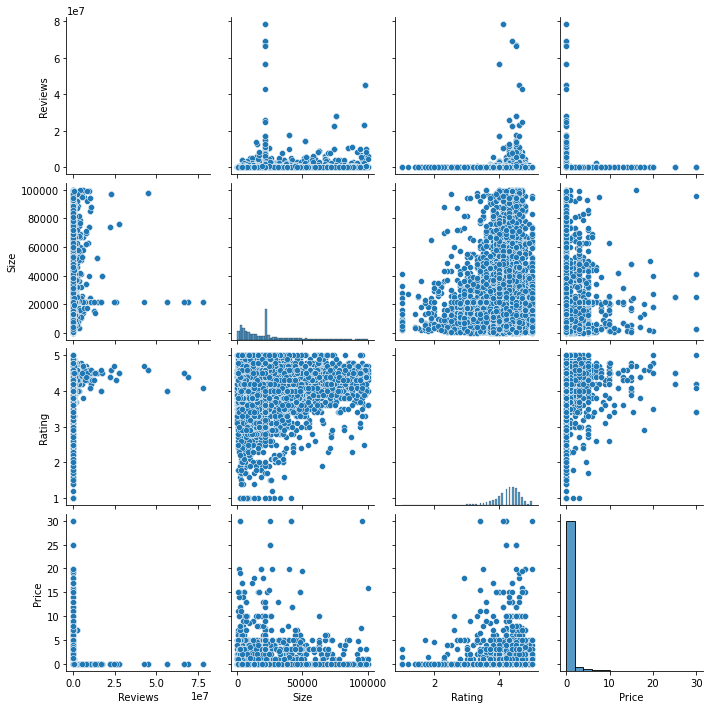

In [385]:
sns.pairplot(data1_new,vars=["Reviews","Size","Rating","Price"],height=2.5)
plt.show()

### 10. Rating vs. content rating
### a. Make a bar plot displaying the rating for each content rating

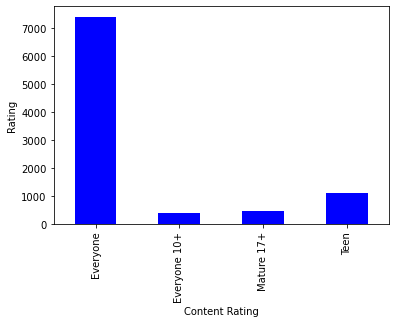

In [386]:
data1_new.groupby('Content Rating')['Rating'].count().plot.bar(color="blue")
plt.ylabel('Rating')
plt.show()

### b. Which metric would you use? Mean? Median? Some other quantile?
### We use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

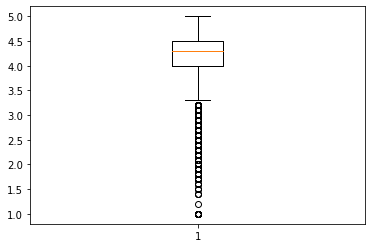

In [387]:
plt.boxplot(data1_new['Rating'])
plt.show()

### c. Choose the right metric and plot

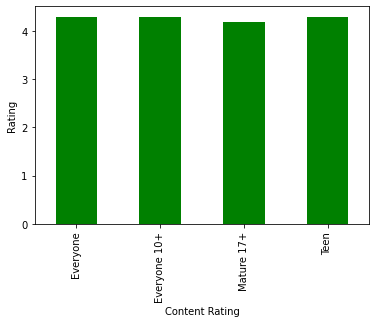

In [388]:
data1_new.groupby('Content Rating')['Rating'].median().plot.bar(color="g")
plt.ylabel('Rating')
plt.show()

### 11. Content rating vs. size vs. rating – 3 variables at a time
### a. Create 5 buckets (20% records in each) based on Size

C:\Users\infotech\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


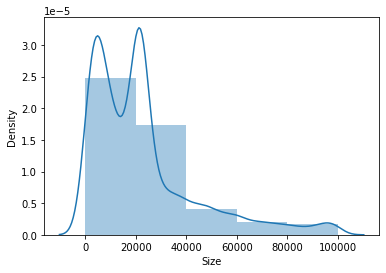

In [389]:
sns.distplot(data1_new["Size"], bins=5)
plt.show()

In [390]:
bins=[0 ,20000, 40000, 60000, 80000, 100000]
data1_new["Size_Buckets"] = pd.cut(data1_new["Size"], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(data1_new, values="Rating", index="Size_Buckets", columns="Content Rating")

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
0-20k,4.150440,4.247561,4.015183,4.189378
20k-40k,4.229441,4.197802,4.195109,4.237590
40k-60k,4.192857,4.265957,4.202222,4.270896
60k-80k,4.278049,4.374000,4.190909,4.291045
80k-100k,4.280000,4.405556,4.252632,4.314815


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each 
combination

In [391]:
Size_Buckets =pd.pivot_table(data1_new, values="Rating", index="Size_Buckets", columns="Content Rating", aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets 

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
0-20k,3.8,4.02,3.5,3.9
20k-40k,4.0,4.00,4.0,4.0
40k-60k,3.9,4.10,4.1,4.0
60k-80k,4.0,4.20,4.0,4.0
80k-100k,4.1,4.30,4.0,4.1


### c. Make a heatmap of this
### i. Annotated

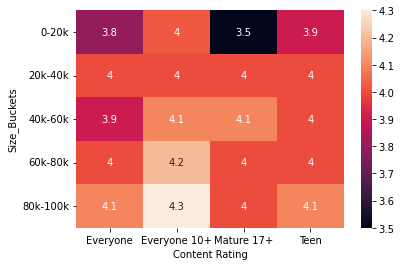

In [392]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

### ii. Greens color map

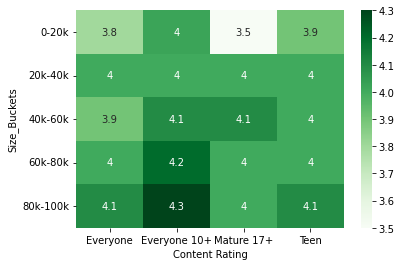

In [393]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

### Through analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, we can conclude that heavier apps are preferred in all categories.